In [1]:
import geopandas as gp
import numpy as np
import os
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
working_dir = '/home/jovyan/LCCS/training_data/'
filename = os.path.join(working_dir, '2015_merged.shp')

In [3]:
data = gp.read_file(filename)

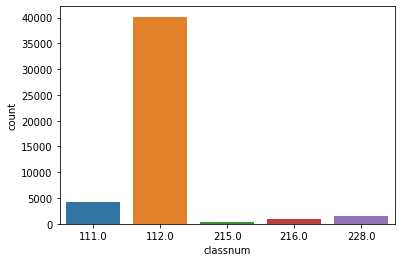

In [52]:
sns.countplot(data['classnum'])

In [42]:
data['weight'] = np.where(data['classnum'] == 112, 0.01, data['weight'])
data['weight'] = np.where(data['classnum'] == 111, 0.3, data['weight'])
data['weight'] = np.where(data['classnum'] == 216, 0.9, data['weight'])
data['weight'] = np.where(data['classnum'] == 228, 0.9, data['weight'])
data['weight'] = np.where(data['classnum'] == 215, 0.9, data['weight'])

In [48]:
sample = data.sample(n=1000, weights = 'weight', random_state = 1234)

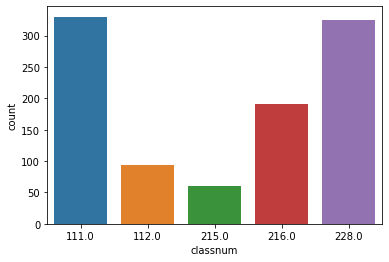

In [49]:
sns.countplot(sample['classnum'])

In [51]:
data['crop'] = np.where(data['classnum'] == 112, 1, 0)

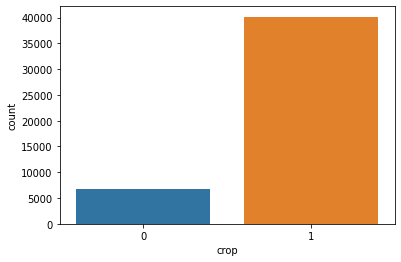

In [53]:
sns.countplot(data['crop'])

In [106]:
data['cropweight'] = np.where(data['crop'] == 1, 0.15, 0.8)

In [107]:
sample = data.sample(n=500, weights = 'cropweight', random_state = 1234)

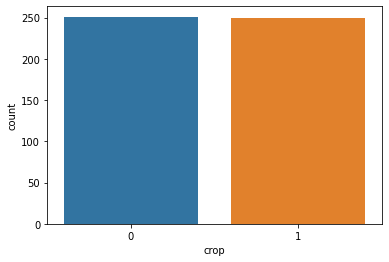

In [108]:
sns.countplot(sample['crop'])

In [109]:
out = sample[['geometry', 'crop']]
print(out.shape)
print(out.head())

out.to_file(os.path.join(working_dir, '2015_merged_sample_500.shp'))

(500, 2)
                                                geometry  crop
4294   POLYGON ((1514350.000 -2133875.000, 1514300.00...     1
26398  POLYGON ((848075.000 -2721850.000, 848050.000 ...     1
17999  POLYGON ((1575450.000 -2198350.000, 1575425.00...     0
37175  POLYGON ((880425.000 -2783350.000, 880425.000 ...     1
36793  POLYGON ((816700.000 -2784975.000, 816675.000 ...     1
